# 1_A

[]

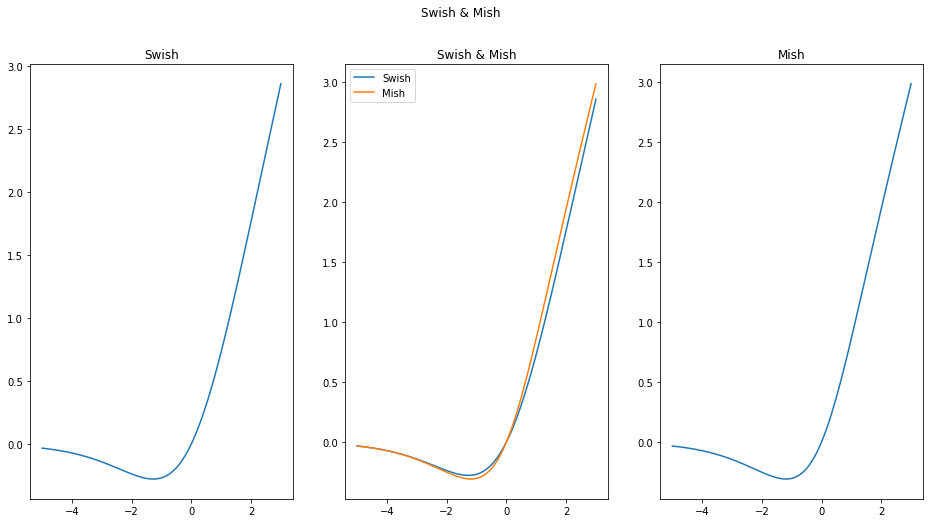

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def swish(x, beta=1):
    return x * sigmoid(beta * x)

def softplus(x):
    return np.log(1 + np.exp(x))

def mish(x):
    return x * np.tanh(softplus(x))

x_range = np.linspace(-5, 3, 200)
y_swish = swish(x_range)
y_mish = mish(x_range)

fig, axis = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle("Swish & Mish ")
axis[0].plot(x_range, y_swish, label="Swish")
axis[0].set_title("Swish")

axis[2].plot(x_range, y_mish, label="Mish")
axis[2].set_title("Mish")

axis[1].plot(x_range, y_swish, label="Swish")
axis[1].plot(x_range, y_mish, label="Mish")
axis[1].set_title("Swish & Mish")
axis[1].legend()

plt.plot()

# 1_B

[]

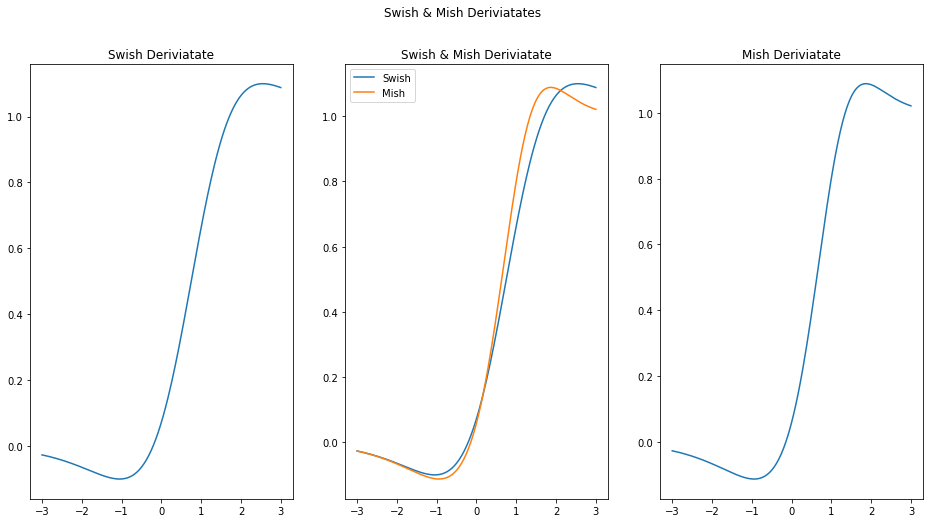

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def deriv_mish(x):
    sech = 1 / np.cosh(softplus(x))
    return sech**2 * swish(x) + mish(x) / x

def deriv_swish(x):
    return swish(x) + sigmoid(x) * (1 - swish(x))


swish_deriv = deriv_swish(x_range)
mish_deriv = deriv_mish(x_range)

x_range = np.linspace(-3, 3, 200)
fig, axis = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle("Swish & Mish Deriviatates")
axis[0].plot(x_range, swish_deriv, label="Swish")
axis[0].set_title("Swish Deriviatate")

axis[2].plot(x_range, mish_deriv, label="Mish")
axis[2].set_title("Mish Deriviatate")

axis[1].plot(x_range, swish_deriv, label="Swish")
axis[1].plot(x_range, mish_deriv, label="Mish")
axis[1].set_title("Swish & Mish Deriviatate")
axis[1].legend()

plt.plot()

# 3. LeakyReLu

In [ ]:
import tensorflow.keras
import numpy as np
from sklearn.utils import shuffle


(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train = np.array([*x_train, *(255 - x_train)])
y_train = np.array([*y_train, *y_train])
x_test = np.array([*x_test, *(255 - x_test)])
y_test = np.array([*y_test, *y_test])
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Shape of x in train data: {}".format(x_train.shape))
print("Shape of x in test data: {}".format(x_test.shape))
print("Shape of y in train data: {}".format(y_train.shape))
print("Shape of y in test data: {}".format(y_test.shape))

Shape of x in train data: (120000, 28, 28)
Shape of x in test data: (20000, 28, 28)
Shape of y in train data: (120000,)
Shape of y in test data: (20000,)


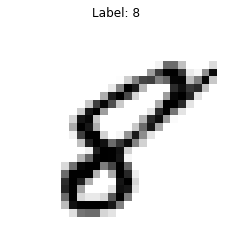

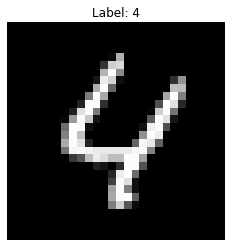

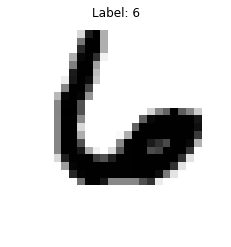

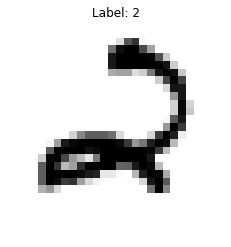

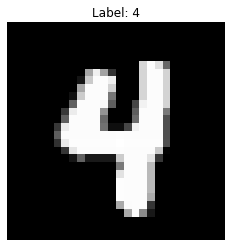

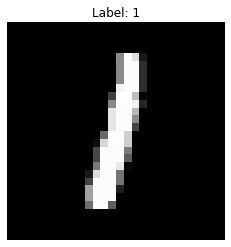

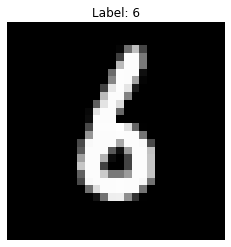

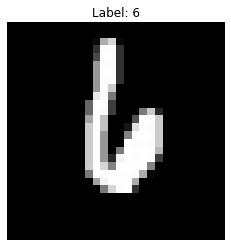

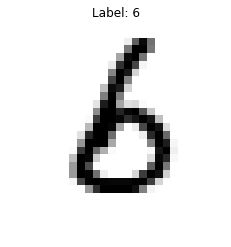

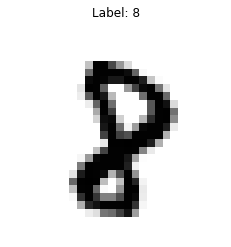

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    img = x_train[i]
    label = y_train[i]
    plt.imshow(img, cmap="binary")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

In [ ]:
x_train = np.reshape(x_train, (*x_train.shape, 1))
x_test = np.reshape(x_test, (*x_test.shape, 1))

In [ ]:
print("Shape of x in train data: {}".format(x_train.shape))
print("Shape of x in test data: {}".format(x_test.shape))
print("Shape of y in train data: {}".format(y_train.shape))
print("Shape of y in test data: {}".format(y_test.shape))

Shape of x in train data: (120000, 28, 28, 1)
Shape of x in test data: (20000, 28, 28, 1)
Shape of y in train data: (120000,)
Shape of y in test data: (20000,)


In [ ]:
from tensorflow.keras.utils import to_categorical


x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
from tensorflow.keras.layers import LeakyReLU, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential


def create_network(a):
    leaky_relu = LeakyReLU(alpha=a)
    network = Sequential([
        Conv2D(8, 7, activation=leaky_relu, input_shape=x_train.shape[1:]),
        Conv2D(8, 5, activation=leaky_relu), Flatten(), Dense(10, activation="softmax"),
        Flatten(),
        Dense(10, activation="softmax")
    ])
    network.compile(optimizer="adam", loss="categorical_crossentropy", 
        metrics=["accuracy"])
    return network

In [75]:
import datetime
from os.path import join

alphas = [-1, -0.5, 0, 0.5, 1]

models = []
histories = []

for i in alphas:
    m = create_network(i)
    history = m.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_split=0.3, verbose=False)
    histories.append(history)
    models.append(m)

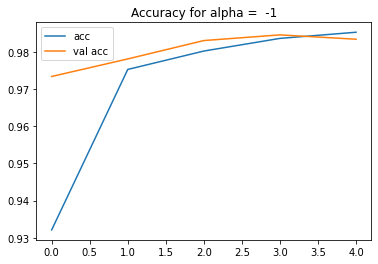

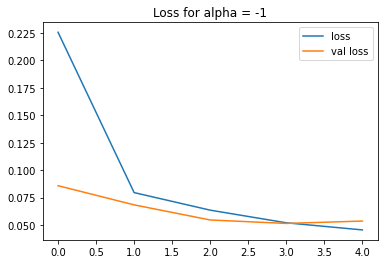

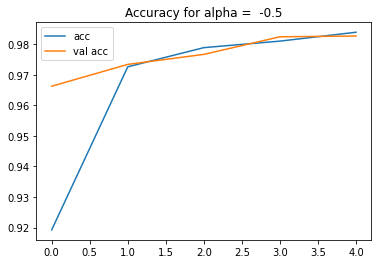

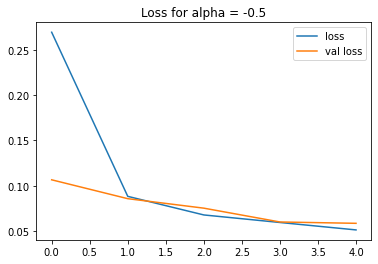

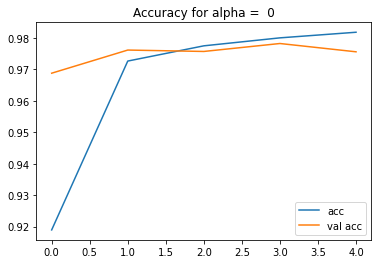

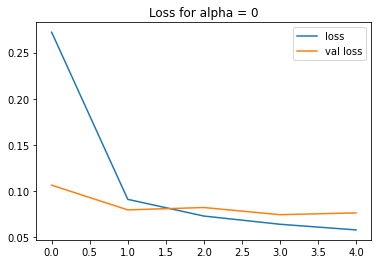

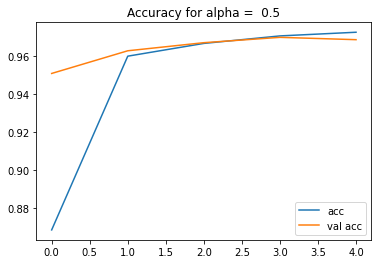

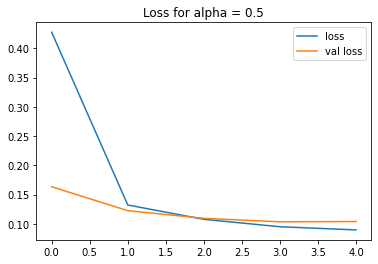

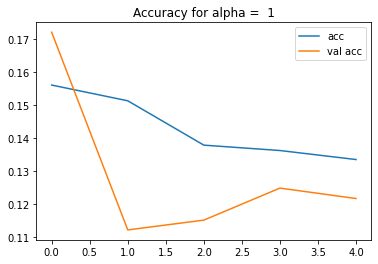

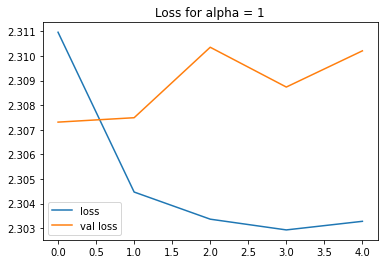

In [76]:
i = 0
for v in histories:
    plt.title(f"Accuracy for alpha =  {alphas[i]}")
    plt.plot(v.history["accuracy"], label=f"acc")
    plt.plot(v.history["val_accuracy"], label=f"val acc")
    plt.legend()
    plt.show()

    plt.title(f"Loss for alpha = {alphas[i]}")
    plt.plot(v.history["loss"], label=f"loss")
    plt.plot(v.history["val_loss"], label=f"val loss")
    plt.legend()
    plt.show()

    i += 1

In [79]:
import pandas as pd

i = 0 

for v in histories:
    h = v.history
    acc = h["accuracy"][-1]
    val_acc = h["val_accuracy"][-1]
    _, test = models[i].evaluate(x_test, y_test, verbose=False)
    print("Alpha = {} train acc = {}".format(alphas[i], acc))
    print("Alpha = {} test acc = {}".format(alphas[i], test))
    print("Alpha = {} val acc = {}".format(alphas[i], val_acc))
    print("-------------------------------------------")
    i += 1

Alpha = -1 train acc = 0.9853214025497437
Alpha = -1 test acc = 0.982200026512146
Alpha = -1 val acc = 0.9834444522857666
-------------------------------------------
Alpha = -0.5 train acc = 0.9839047789573669
Alpha = -0.5 test acc = 0.9814500212669373
Alpha = -0.5 val acc = 0.9826666712760925
-------------------------------------------
Alpha = 0 train acc = 0.9818333387374878
Alpha = 0 test acc = 0.9789000153541565
Alpha = 0 val acc = 0.9756110906600952
-------------------------------------------
Alpha = 0.5 train acc = 0.9725714325904846
Alpha = 0.5 test acc = 0.9742000102996826
Alpha = 0.5 val acc = 0.968666672706604
-------------------------------------------
Alpha = 1 train acc = 0.13341666758060455
Alpha = 1 test acc = 0.13384999334812164
Alpha = 1 val acc = 0.12158333510160446
-------------------------------------------


In [86]:
from tensorflow.keras.layers import LeakyReLU, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential


def create_network(a):
    Prelu = tensorflow.keras.layers.PReLU(
    alpha_initializer="zeros",
    alpha_regularizer=None,
    alpha_constraint=None,
    shared_axes=[1,2]
    )
    network = Sequential([
        Conv2D(8, 7, activation=Prelu, input_shape=x_train.shape[1:]),
        Conv2D(8, 5, activation=Prelu), Flatten(), Dense(10, activation="softmax"),
        Flatten(),
        Dense(10, activation="softmax")
    ])
    network.compile(optimizer="adam", loss="categorical_crossentropy", 
        metrics=["accuracy"])
    return network


    Layer.get_weights()

In [88]:
import datetime
from os.path import join

alphas = [-1, -0.5, 0, 0.5, 1]

models = []
histories = []

for i in alphas:
    m = create_network(i)
    history = m.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_split=0.3, verbose=False)
    histories.append(history)
    models.append(m)

for m in models:
  for layer in m.layers:
    w = layer.get_weights()
    print(w)
    print("-----------------")

[array([[[[-3.23687750e-03, -3.57378498e-02, -4.00694422e-02,
           1.48339206e-02, -5.37432060e-02, -6.77331984e-02,
           1.47333577e-01,  1.11585617e-01]],

        [[-1.95563696e-02,  5.50564378e-04, -4.62531634e-02,
          -1.24928333e-01, -1.77942738e-01, -1.89824626e-02,
           7.58858025e-02, -1.06689997e-01]],

        [[ 6.07035644e-02, -3.37607786e-02, -2.80417819e-02,
          -1.49725735e-01, -1.24866739e-01, -7.64131248e-02,
           6.13519317e-03, -6.37468621e-02]],

        [[ 6.15087226e-02, -2.34229653e-03,  3.69737819e-02,
           3.55503196e-03,  2.14864239e-02,  1.57742262e-01,
           1.13882720e-01, -1.09288417e-01]],

        [[ 1.86707035e-01,  1.03580095e-01, -1.51002258e-02,
           1.13135204e-01, -5.65059856e-02,  2.98153665e-02,
           1.32489398e-01, -1.30772337e-01]],

        [[ 8.78420770e-02,  1.27079645e-02,  8.91337078e-03,
           5.55790477e-02, -1.36024989e-02,  2.37991679e-02,
           3.74298766e-02,  3.30